In [0]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from matplotlib import pyplot as plt

In [0]:
# Convert vector to image
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

In [0]:
bs = 1000

transform = transforms.Compose([transforms.ToTensor()])

traindataset = FashionMNIST('./data', download=True, train=True, transform=transform)
testdataset = FashionMNIST('./data', download=True, train=False, transform=transform)

# Loaders
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=bs, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=bs, shuffle=False, num_workers=4)

In [0]:
# Displaying routine
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

### fully connected auto-encoder 

In [0]:
class Fully_AutoEncoder(nn.Module):
    def __init__(self):
        super(Fully_AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
        nn.Linear(28*28, 100),
        nn.ReLU())
        
        self.decoder = nn.Sequential(
        nn.Linear(100, 28*28),
        nn.ReLU())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
model_f_ae = Fully_AutoEncoder()

In [0]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_f_ae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/20], loss:0.0405
epoch [2/20], loss:0.0290
epoch [3/20], loss:0.0252
epoch [4/20], loss:0.0224
epoch [5/20], loss:0.0212
epoch [6/20], loss:0.0195
epoch [7/20], loss:0.0195
epoch [8/20], loss:0.0177
epoch [9/20], loss:0.0173
epoch [10/20], loss:0.0169
epoch [11/20], loss:0.0164
epoch [12/20], loss:0.0161
epoch [13/20], loss:0.0157
epoch [14/20], loss:0.0154
epoch [15/20], loss:0.0151
epoch [16/20], loss:0.0147
epoch [17/20], loss:0.0151
epoch [18/20], loss:0.0145
epoch [19/20], loss:0.0148
epoch [20/20], loss:0.0148


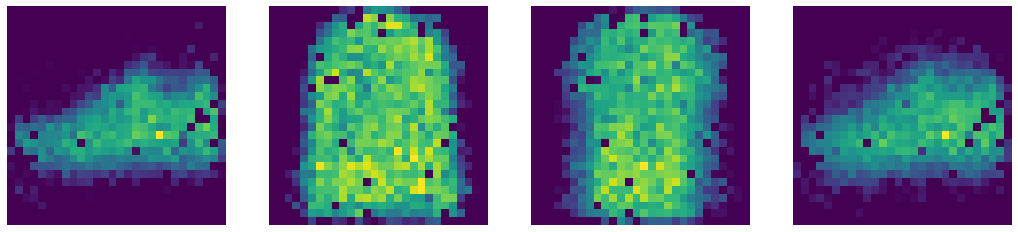

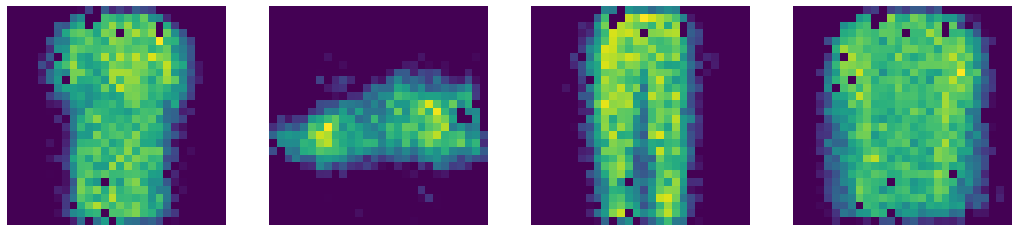

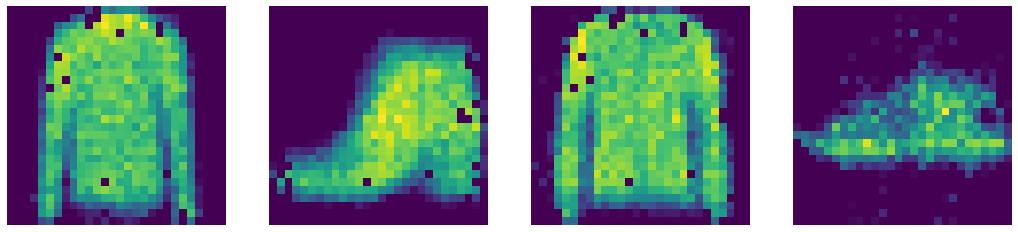

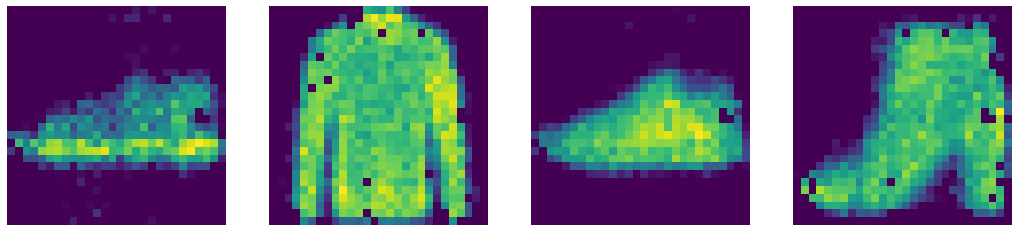

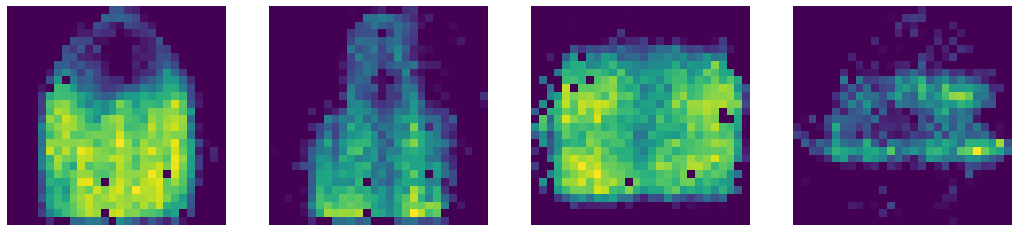

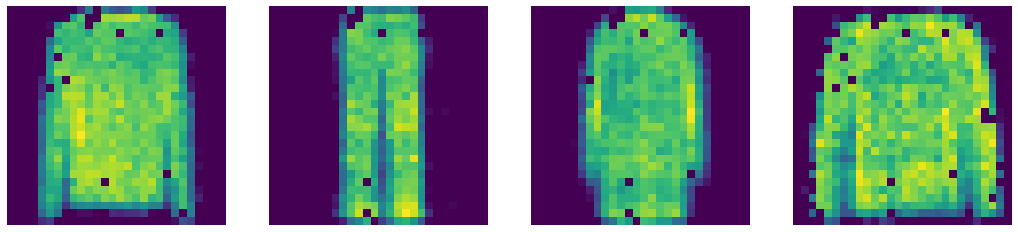

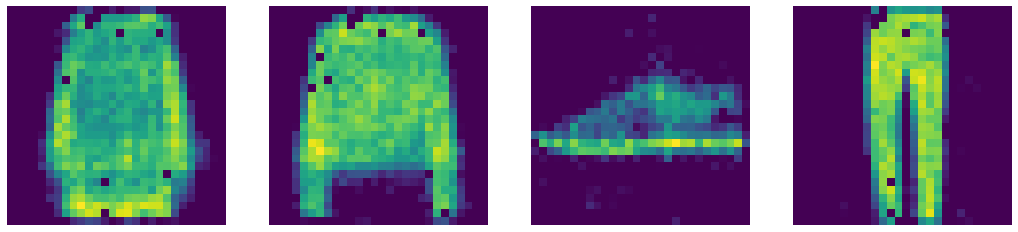

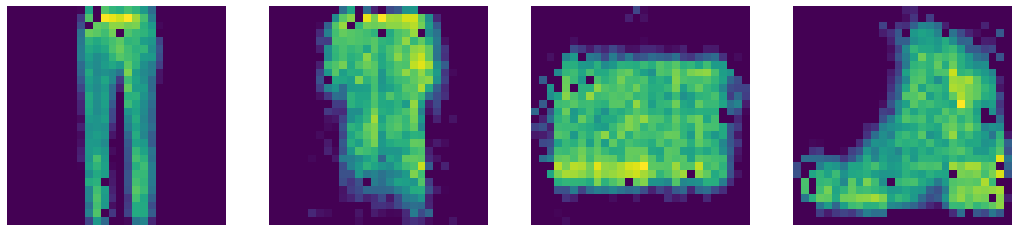

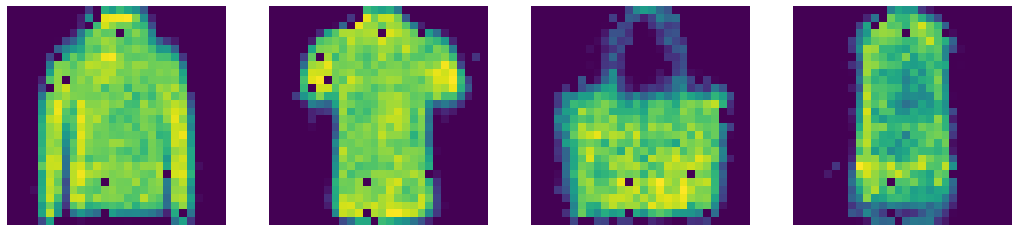

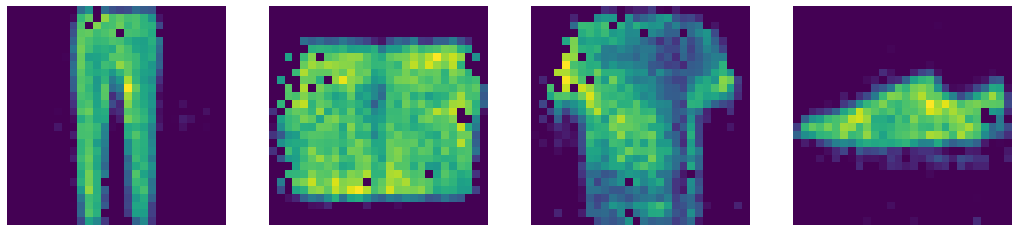

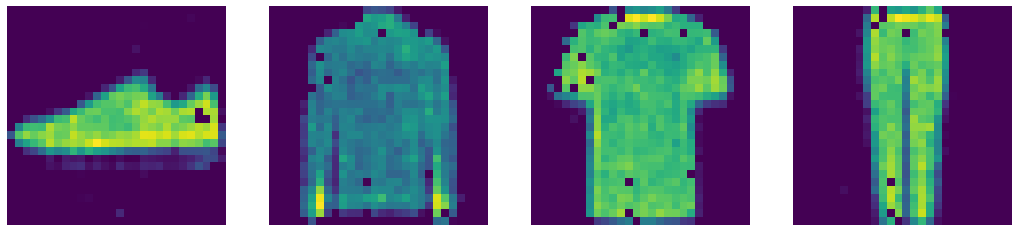

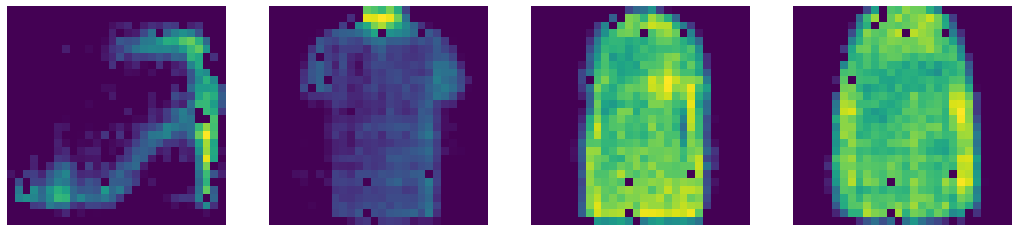

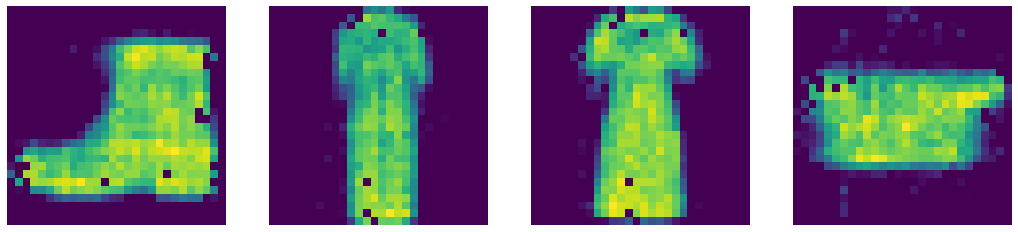

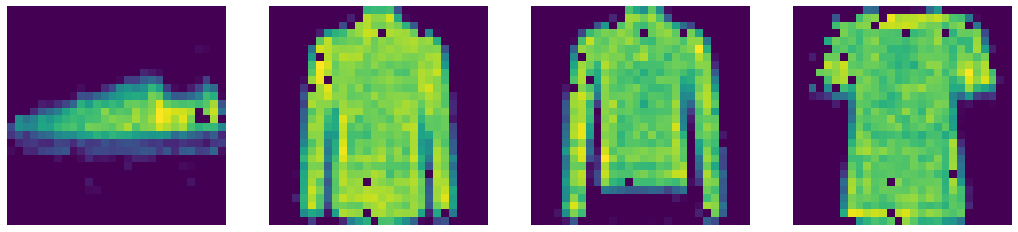

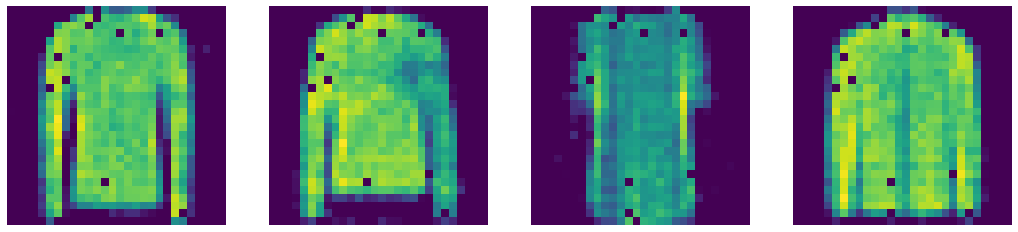

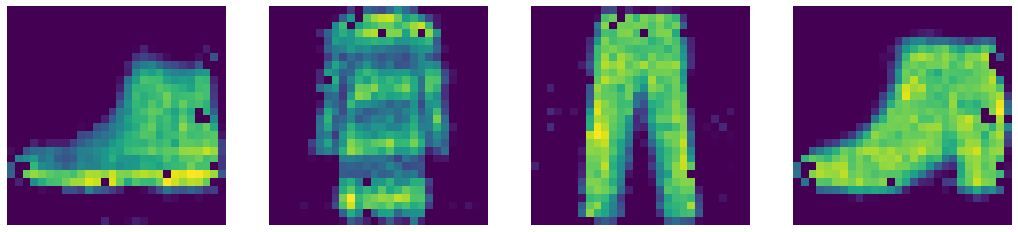

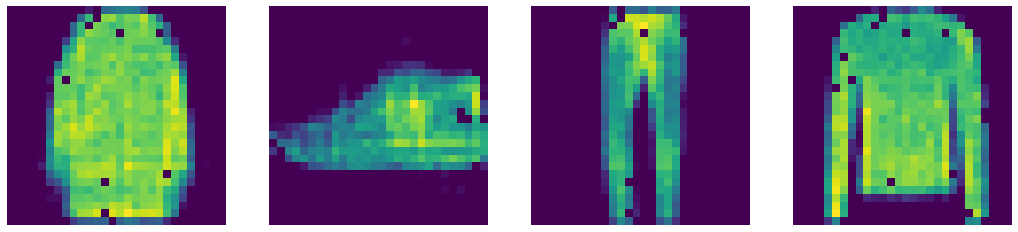

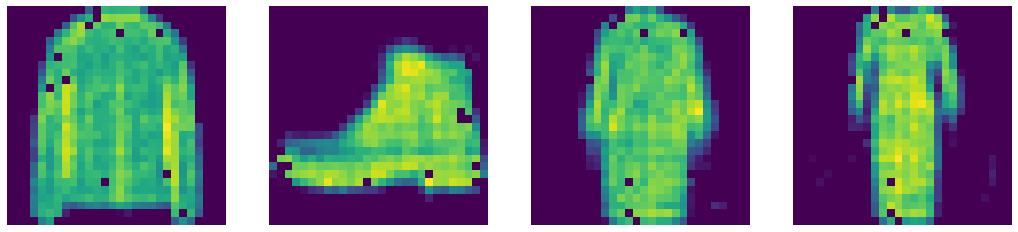

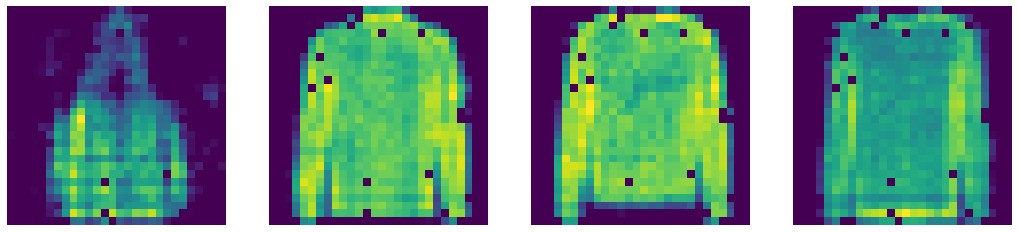

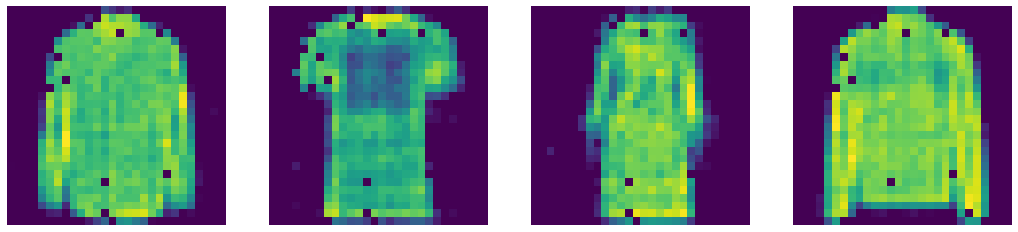

In [9]:
num_epochs = 20

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
        img = img.view(img.size(0), -1)
        output = model_f_ae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [0]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

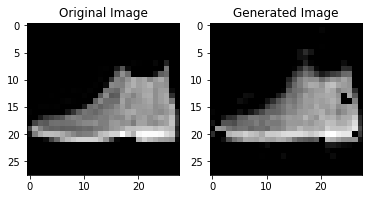

In [11]:
test_images, labels = next(iter(testloader))

test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_f_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

# Exercises

Your exercise should you choose to accept, is to 

1. change the model class to use Convolution Layers and re-run with the same training code in cells below.
2. Edit the code above for denoising autoencoder? (bonus point if your code it)
3. Briefly describe the performance of using the fully connected auto-encoder to the CNN_Autoencoder

Deadline: Today: 2:pm

In [0]:
import torch.nn as nn
import torch.nn.functional as F
class CNN_AutoEncoder(nn.Module):
    def __init__(self):
        super(CNN_AutoEncoder, self).__init__()
        
        
        
        
        ## encoder layers ##
        # conv layer (depth from 1 --> 16), 3x3 kernels
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  
        # conv layer (depth from 16 --> 4), 3x3 kernels
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        # pooling layer to reduce x-y dims by two; kernel and stride of 2
        self.pool = nn.MaxPool2d(2, 2)
        
        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)


        # self.encoder = nn.Sequential(
        #     nn.Conv2d(1, 16, 3, padding=1),
        #     nn.ReLU(),
        #     nn.Conv2d(16, 4, 3, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(2, 2)
        
        # )
        # self.decoder = nn.Sequential(
        #     nn.ConvTranspose2d(4, 16, 2, stride=2),
        #     nn.ReLU(),
        #     nn.ConvTranspose2d(16, 1, 2, stride=2),
        #     nn.Sigmoid()
        # )   

#         self.encoder = nn.Sequential(
#             nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 3, stride = 3, padding = 1),
#             nn.LeakyReLU(),
#             #nn.ReLU(),
#             nn.AvgPool2d(kernel_size = 2, stride = 2),  
#             nn.Conv2d(in_channels = 16, out_channels = 8, kernel_size = 3, stride = 2, padding = 1),
#             nn.LeakyReLU(),
#             #nn.ReLU(),
#             nn.AvgPool2d(kernel_size = 2, stride = 1) ) 
        
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose2d(in_channels = 8, out_channels =16, kernel_size = 3, stride = 2, padding = 0),
#             nn.LeakyReLU(),
#             #nn.ReLU(),
#             nn.ConvTranspose2d(in_channels = 16, out_channels = 8, kernel_size = 5, stride = 3, padding = 1),
#             nn.LeakyReLU(),
#             #nn.ReLU(),
#             nn.ConvTranspose2d(in_channels = 8, out_channels = 1, kernel_size = 2, stride = 2, padding = 1),
#             nn.Tanh()
            
        #)
        
    def forward(self, x):
        
        ## encode ##
        # add hidden layers with relu activation function
        # and maxpooling after
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        # add second hidden layer
        x = F.relu(self.conv2(x))
        x = self.pool(x)  # compressed representation
        
        ## decode ##
        # add transpose conv layers, with relu activation function
        x = F.relu(self.t_conv1(x))
        # output layer (with sigmoid for scaling from 0 to 1)
        x = F.sigmoid(self.t_conv2(x))
#         x = self.encoder(x)
#         x = self.decoder(x)
        return x

In [0]:
model_cnn_ae = CNN_AutoEncoder()

In [0]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_cnn_ae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch [1/20], loss:0.1165
epoch [2/20], loss:0.0416
epoch [3/20], loss:0.0261
epoch [4/20], loss:0.0218
epoch [5/20], loss:0.0202
epoch [6/20], loss:0.0189
epoch [7/20], loss:0.0187
epoch [8/20], loss:0.0177
epoch [9/20], loss:0.0174
epoch [10/20], loss:0.0178
epoch [11/20], loss:0.0171
epoch [12/20], loss:0.0168
epoch [13/20], loss:0.0168
epoch [14/20], loss:0.0166
epoch [15/20], loss:0.0166
epoch [16/20], loss:0.0161
epoch [17/20], loss:0.0164
epoch [18/20], loss:0.0160
epoch [19/20], loss:0.0157
epoch [20/20], loss:0.0157


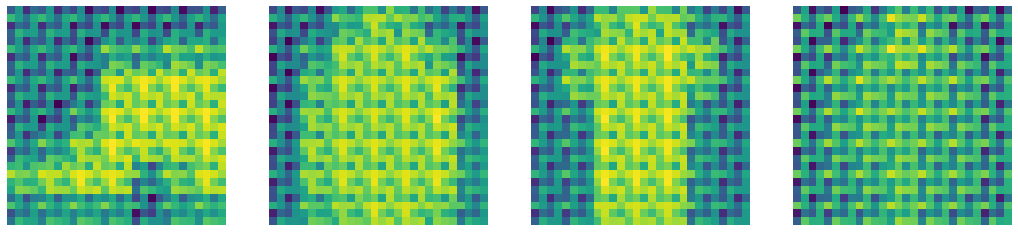

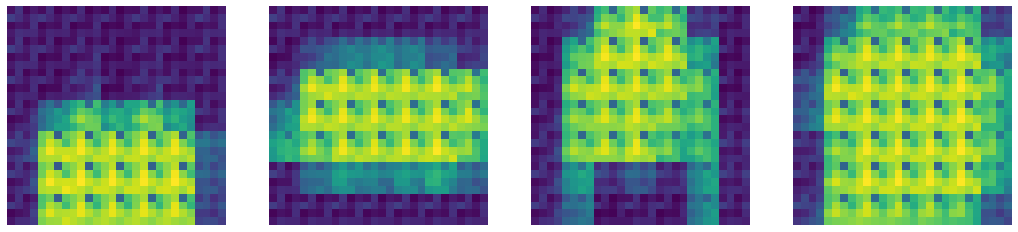

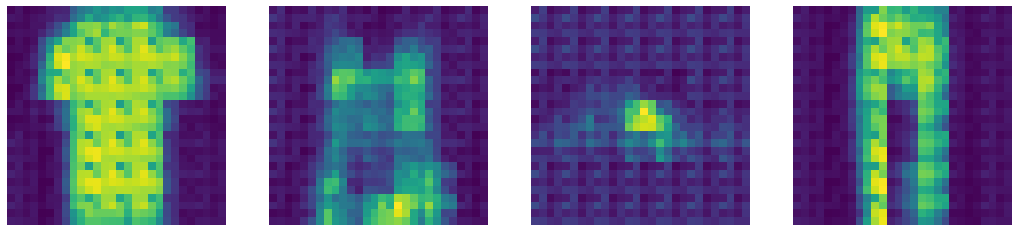

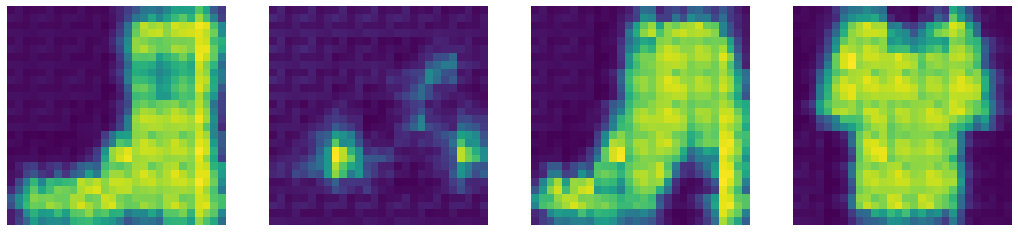

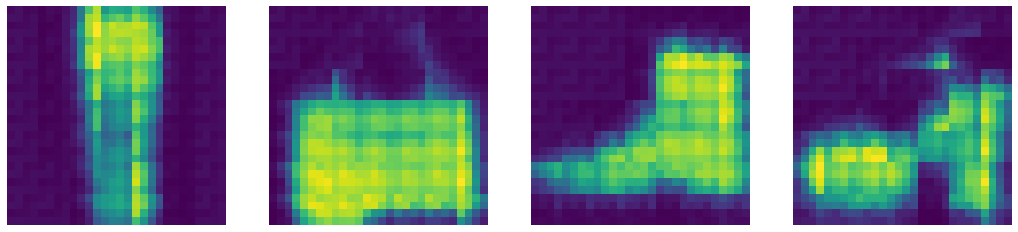

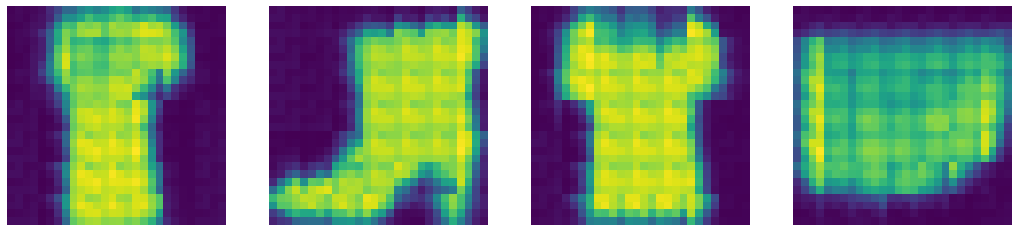

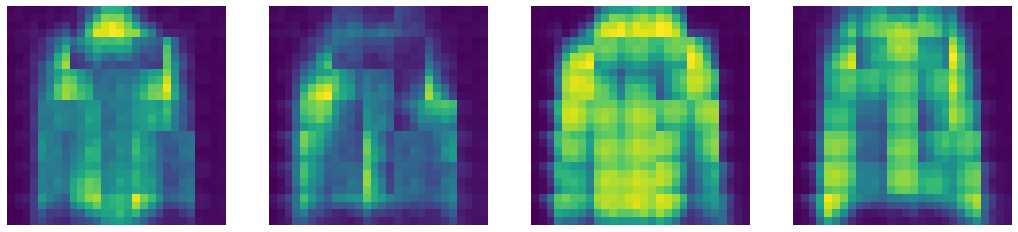

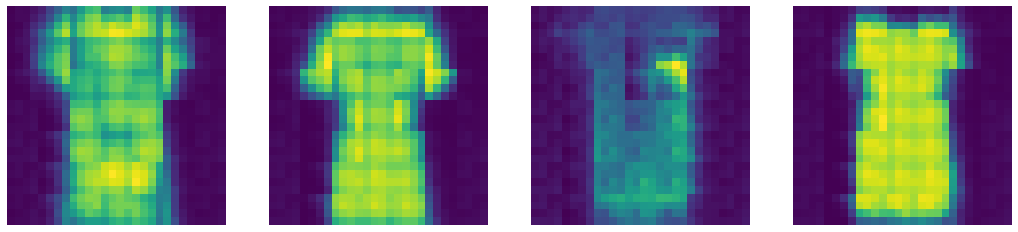

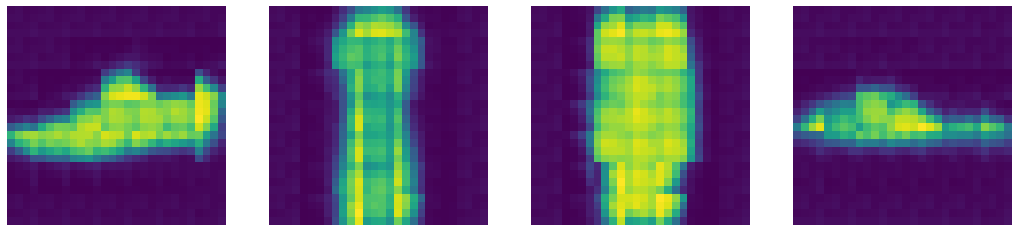

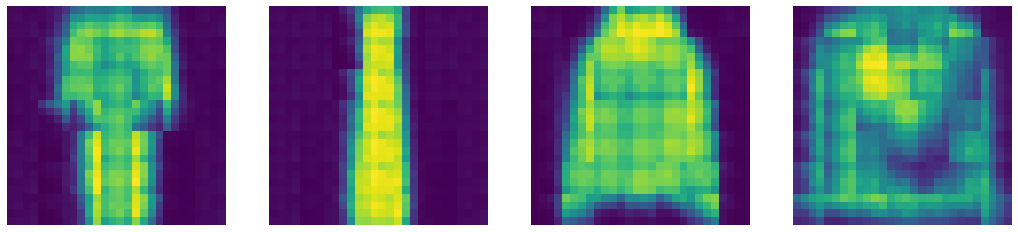

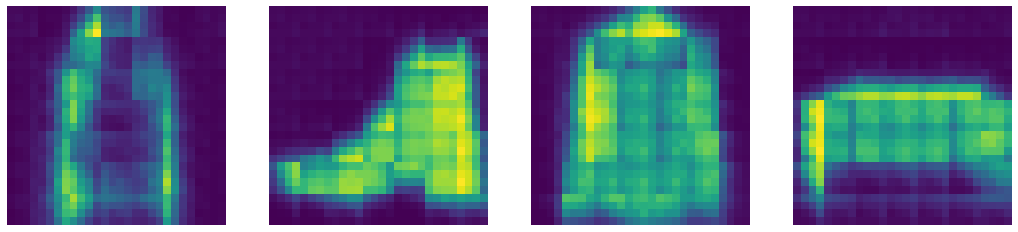

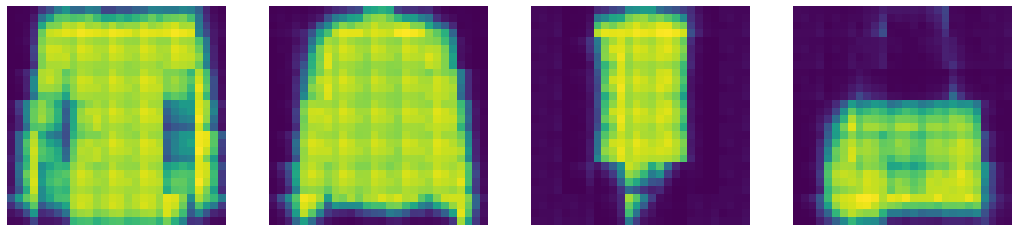

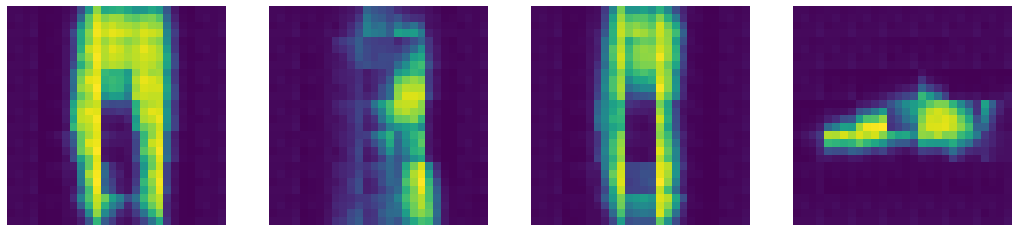

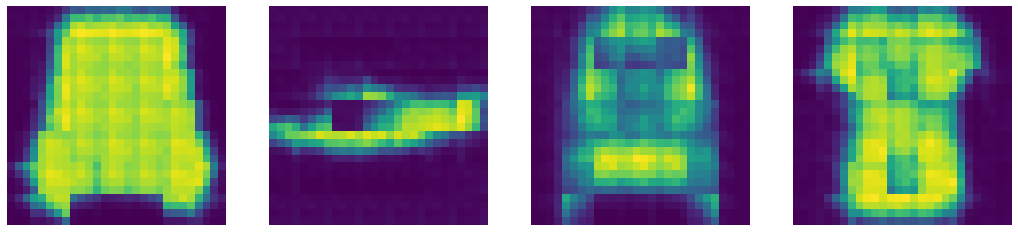

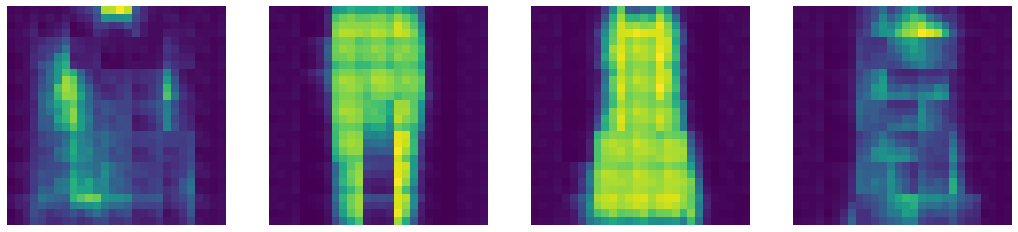

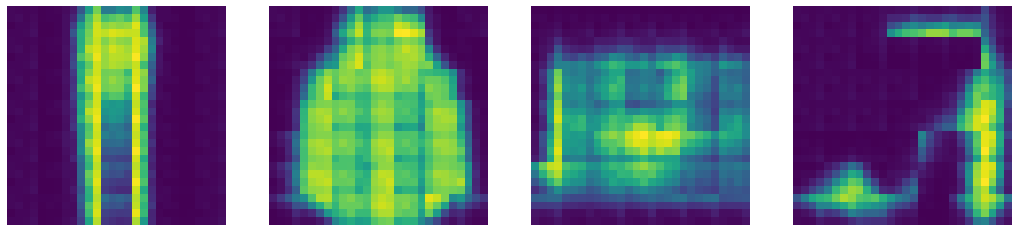

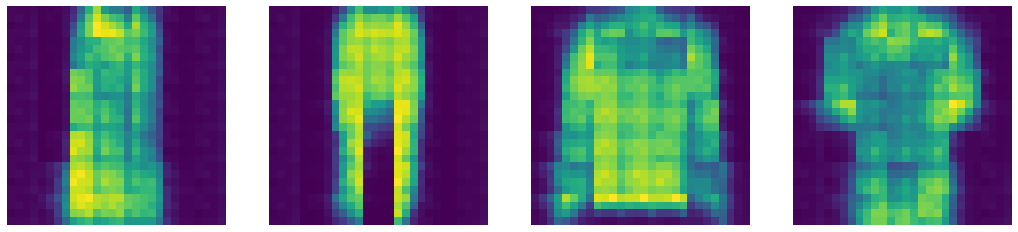

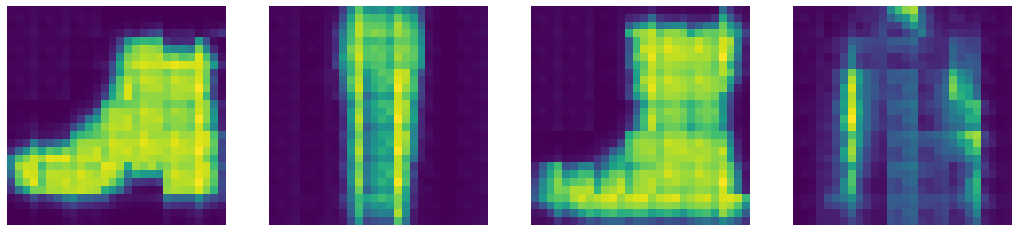

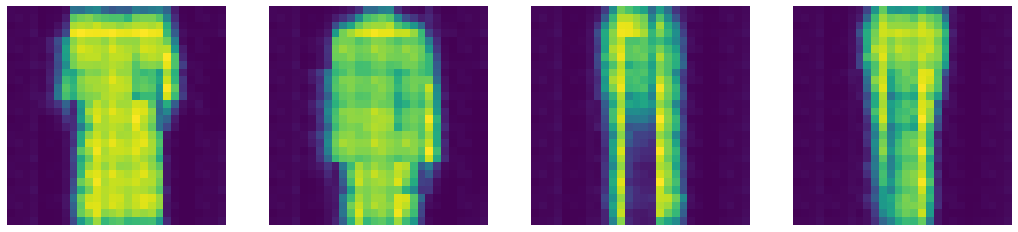

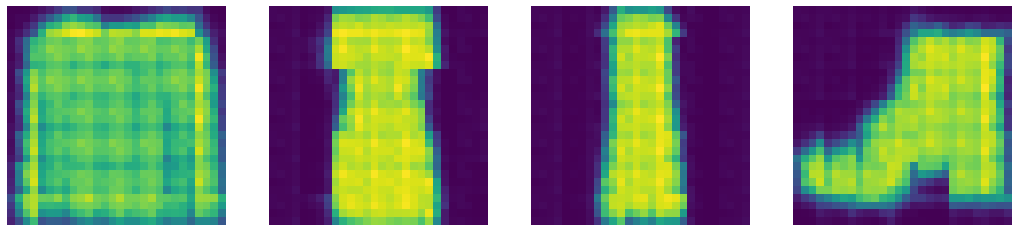

In [29]:
num_epochs = 20

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        #img.requires_grad_()
        #img = img.view(img.size(0), -1)
        output = model_cnn_ae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [0]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


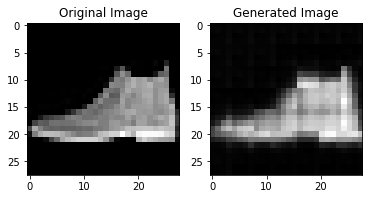

In [31]:
test_images, labels = next(iter(testloader))
#test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_cnn_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

### performance of using the fully connected auto-encoder to the CNN_Autoencoder

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


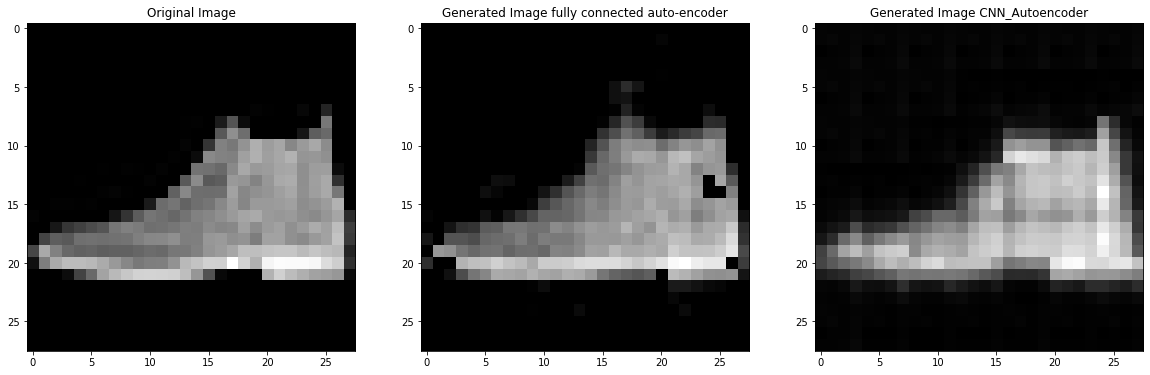

In [32]:
test_images, labels = next(iter(testloader))
#test_images = Variable(test_images.view(test_images.size()[0], -1))

test_image = Variable(test_images.view(test_images.size()[0], -1))
#test_output = model_f_ae(test_images)

test_outputfully = model_f_ae(test_image)
test_outputcnn = model_cnn_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
outf = test_outputfully.view(-1, 28, 28)
outcnn = test_outputcnn.view(-1, 28, 28)

fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(1, 3, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 3, 2)
plot.set_title('Generated Image fully connected auto-encoder')
imgplot = plt.imshow(outf[0].cpu().detach(), cmap='gray')

plot = fig.add_subplot(1, 3, 3)
plot.set_title('Generated Image CNN_Autoencoder')
imgplot = plt.imshow(outcnn[0].cpu().detach(), cmap='gray')
plt.show()

##### Observing the images above, we notice that the image generated by a fully connected autoencoder has patches but is much clear than the image generated by the CNN_autoencoder

#### CNN_autoencoder do not have patches but is much more blurry. This is due to the size of the image and the number of conv transpose we use in the decoder.


#### But we can conclude that the CNN_autoencoder learn better feature than the fully connected autoencoder.

### Also if we train the CNN_autoencoder for longer it will perform better

# **Variational Autoencoder**

In [0]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.z_size = 32
        ## encoder layers ##
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  
       
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
       
        self.pool = nn.MaxPool2d(2, 2)

        self.mu = nn.Linear(196, self.z_size)
        self.var = nn.Linear(196, self.z_size)
        self.Z = nn.Linear(self.z_size, 196 )

        ## decoder layers ##
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)

    def reparametrize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std
        
        
    def forward(self, x):
        
        ## encode ##
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x) 
        #print(x.shape)
        x = x.view(1000,-1) 
        #print(x.shape)
        mu =self.mu(x)
        #print(x.shape)
        var = self.var(x)
        z = self.reparametrize(mu,var)
        #print(z.shape) #1000x32
        z = self.Z(z)
        #print(z.shape)
        z = z.view(-1,4, 7, 7) 

        ## decode ##
        x = F.relu(self.t_conv1(z))
        x = F.sigmoid(self.t_conv2(x))
        return x ,mu,var

In [0]:
model = VAE()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def criterion(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x)
    KLD = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD, BCE, KLD



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch [1/20], loss:0.6073
epoch [2/20], loss:0.5693
epoch [3/20], loss:0.5342
epoch [4/20], loss:0.5168
epoch [5/20], loss:0.5022
epoch [6/20], loss:0.4853
epoch [7/20], loss:0.4847
epoch [8/20], loss:0.4739
epoch [9/20], loss:0.4712
epoch [10/20], loss:0.4634
epoch [11/20], loss:0.4558
epoch [12/20], loss:0.4544
epoch [13/20], loss:0.4589
epoch [14/20], loss:0.4587
epoch [15/20], loss:0.4592
epoch [16/20], loss:0.4552
epoch [17/20], loss:0.4525
epoch [18/20], loss:0.4556
epoch [19/20], loss:0.4575
epoch [20/20], loss:0.4517


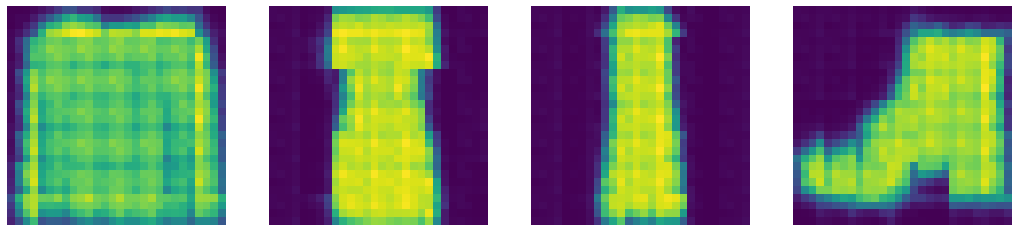

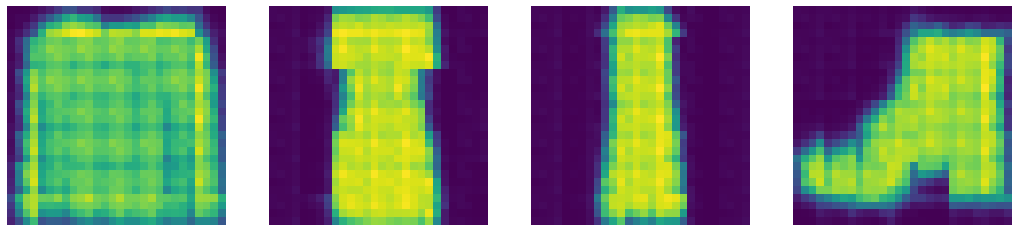

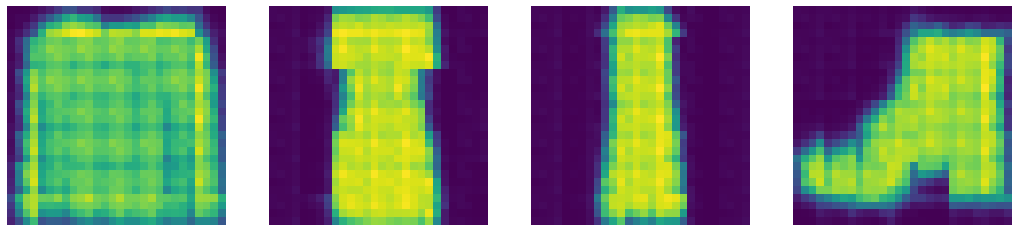

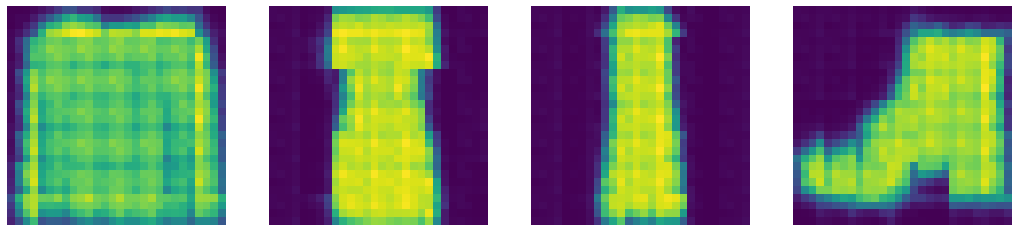

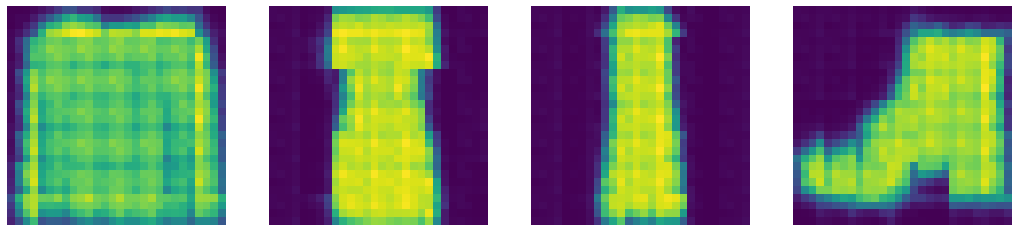

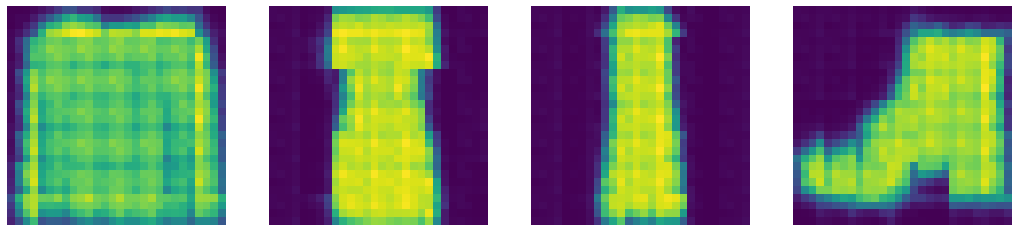

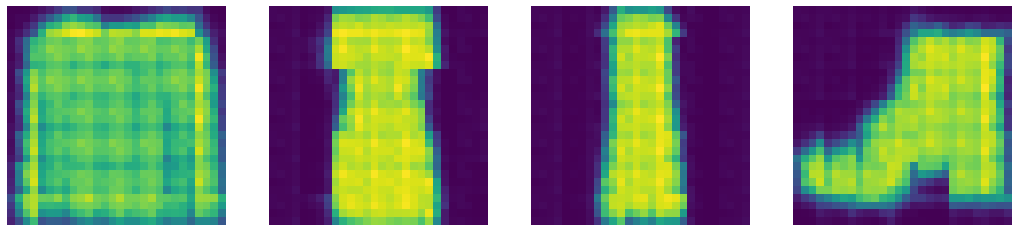

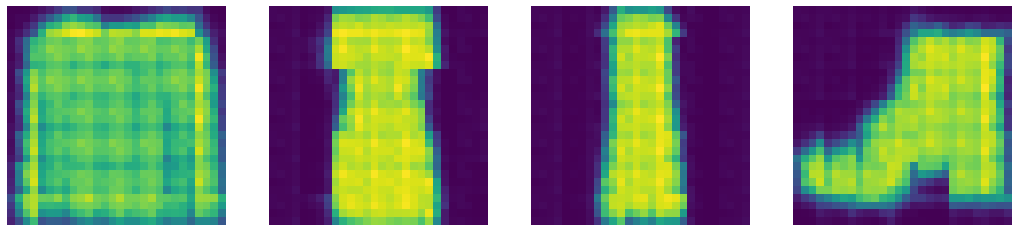

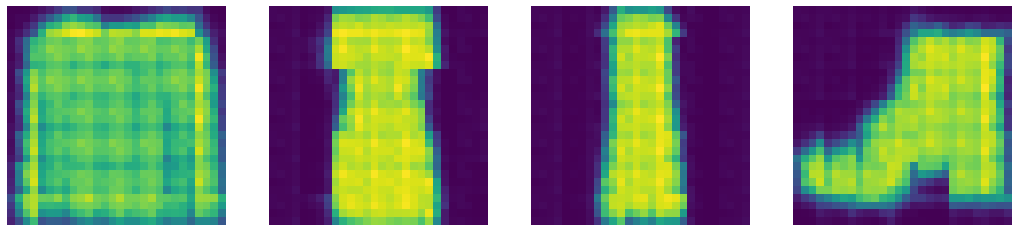

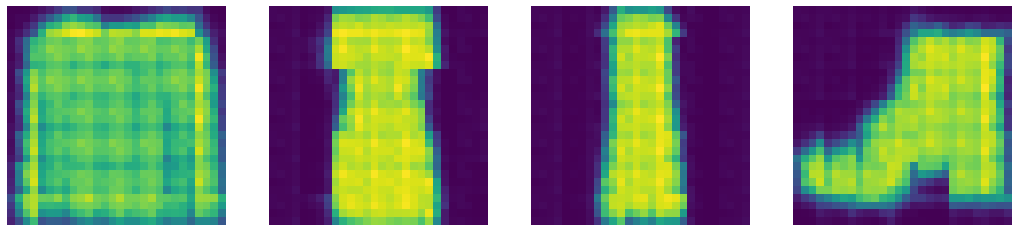

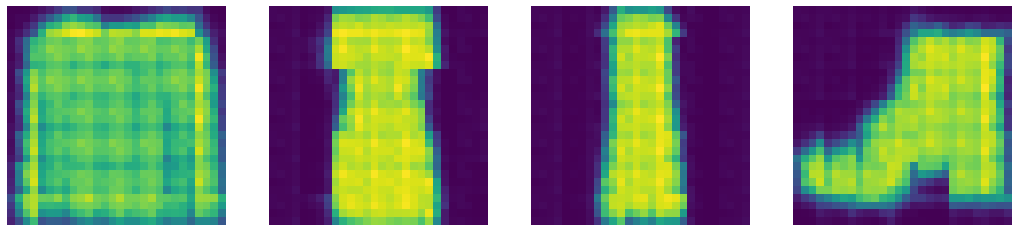

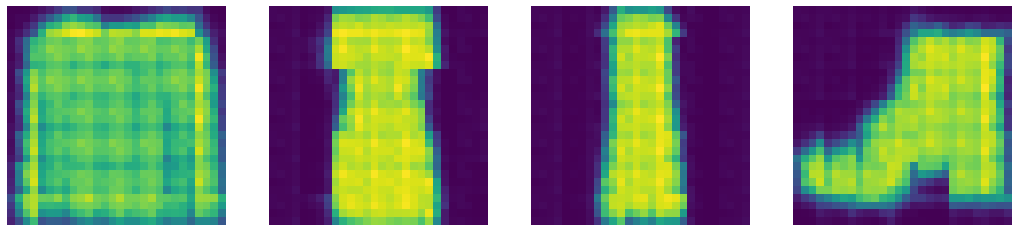

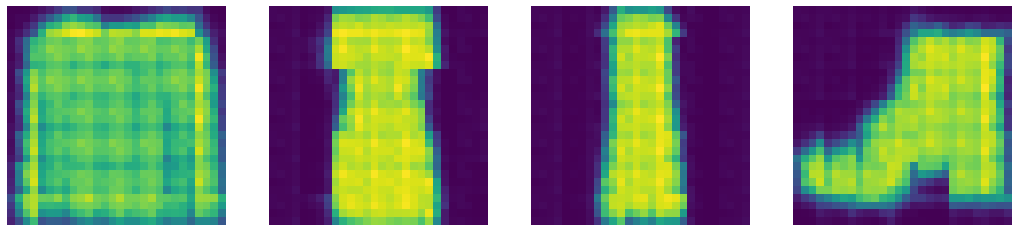

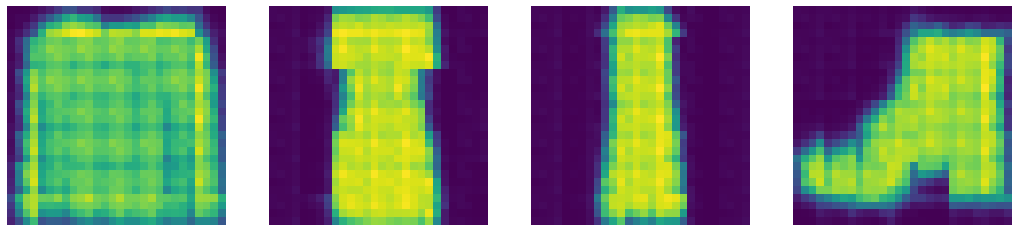

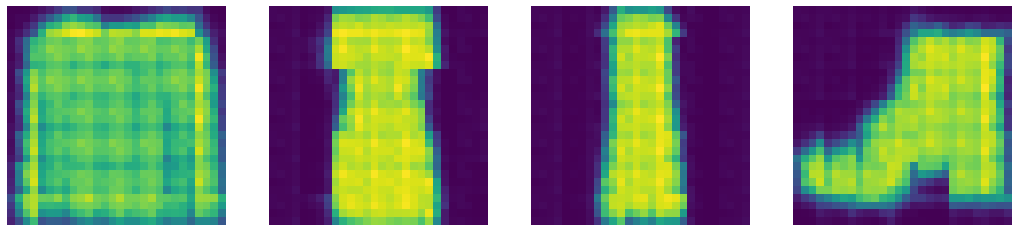

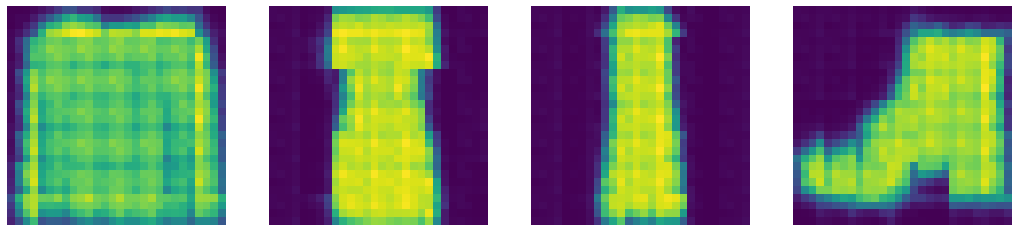

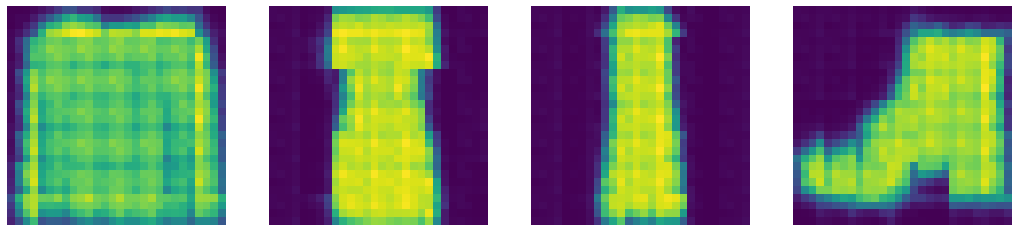

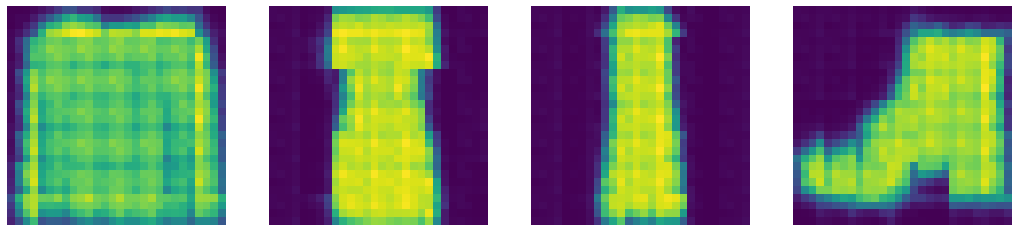

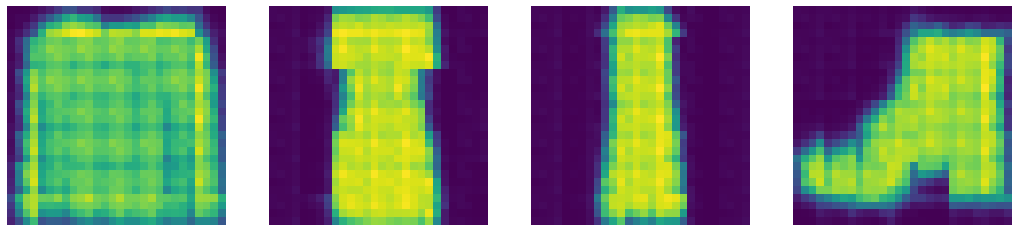

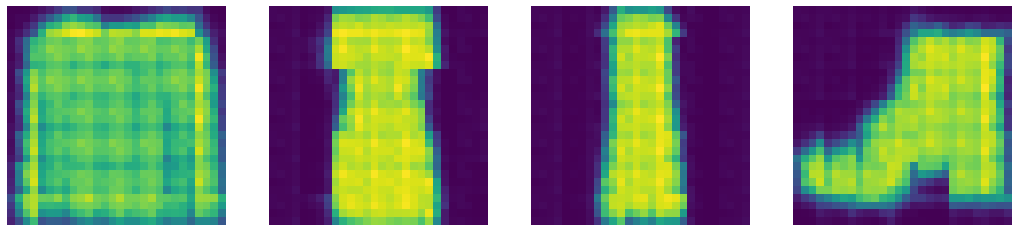

In [124]:
num_epochs = 20

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        recon_img, mu, logvar = model(img) 
        loss,_,_ = criterion(recon_img, img, mu, logvar)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #break
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [0]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


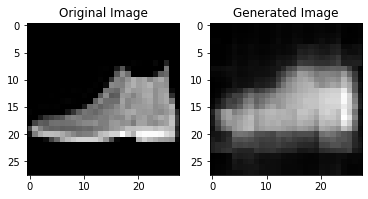

In [127]:
test_images, labels = next(iter(testloader))
#test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output,_,_ = model(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()